In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importamos datos
pax_data = pd.read_csv('pax_data_363_agreements_11-04-20.csv')
pax_data.shape

(363, 78)

In [3]:
#como el númerco de columnas es mayor de lo que se puede visualizar en pantalla al realizar describe, verificamos los tipos de datos para visualizar el resumen de los tipos de datos por separado
pax_data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [4]:
#visualizamos algunos valores estadísticos de las variables numéricas
pax_data.describe(include=('int64'))

,PP,AgtId,Lgt,N_characters,WggPar,WggGenQuot,WggEffPart,WggCitizen,WggParOth,WggEq,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,77.030303,1044.336088,18.366391,35584.867769,0.415978,0.123967,0.305785,0.044077,0.090909,0.297521,...,0.099174,0.099174,0.096419,0.019284,0.011019,0.151515,0.090909,0.046832,0.033058,0.077135
std,44.807096,596.664460,35.373472,77000.143249,0.493570,0.329999,0.461375,0.205550,0.287877,0.457799,...,0.299307,0.299307,0.295572,0.137710,0.104537,0.359045,0.287877,0.211570,0.179034,0.267174
min,2.000000,2.000000,1.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,551.500000,3.000000,6801.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87.000000,903.000000,7.000000,14629.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111.000000,1527.500000,15.000000,30391.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,158.000000,2247.000000,323.000000,908459.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
pax_data['WggRehab'].dtypes

dtype('int64')

In [5]:
#visualizamos la descripción de las variables cualitativas. Lo exportamos a csv para su mejor visualización
pax_data.describe(include='object')

,Con,Contp,PPName,Reg,Agt,Dat,Status,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO
count,363,363,363,363,363,363,363,363,363,358,358,212,216,358,21
unique,74,4,86,6,362,333,4,3,5,16,344,202,215,52,4
top,Colombia,Government,Colombia V - Santos,Africa (excl MENA),Statement of the State Commissions of Abkhazia...,1996-02-16,Multiparty signed/agreed,Intra,SubPar,MultIss,"EZLN, Mexican Government","William Clinton, U.S. President; Warren Christ...",- the relevant Resolution of the Conference on...,SSD,SDN
freq,24,182,19,164,2,5,341,284,137,73,5,4,2,27,10


In [7]:
#hacemos copia de los datos para realizar las transformaciones
new_data = pax_data.copy(deep=True)


In [8]:
new_data['Equality'] = np.where((new_data['WggSocEq'] | new_data['WggEqGen'])==1, 1, 0)

Al visualizar los proyectos que contienen componente de igualdad política y legal en relación el género [WggEqGen] e igualdad social [WggSocEq] en referencia a las mujeres, se puede observar que más de la mitad de los acuerdos de paz no contienen estos componenentes. Por tanto, se propone crear una nueva variable ('Equality'), que agrupe en una sola los casos en los que algunas de las variables antes mencionadas sea 1, para poder visualizar si hay algún componente de igualdad en el acuerdo de paz

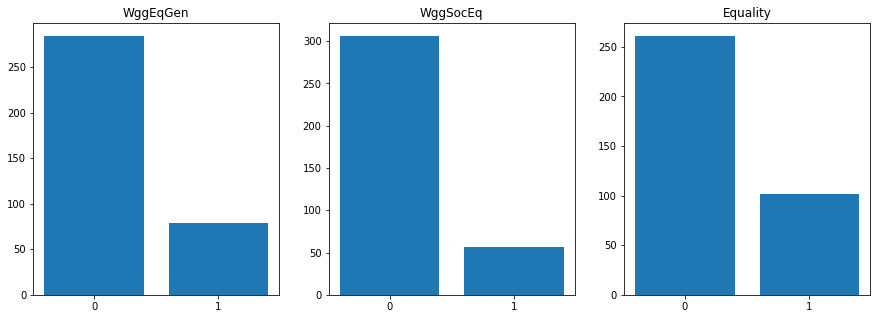

In [41]:
#visualizamos las variables relacionadas con la igualdad
x_values = ['0', '1']
Equality_list = ['WggEqGen', 'WggSocEq', 'Equality']
fig, axs = plt.subplots(nrows=1, ncols=len(Equality_list), figsize= (15,5))
for i, name in enumerate(Equality_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

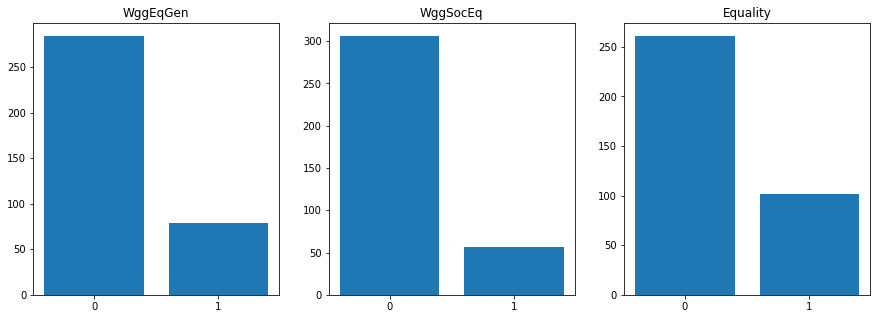

In [11]:
#visualizamos las variables relacionadas con la igualdad
x_values = ['0', '1']
Equality_list = ['WggEqGen', 'WggSocEq', 'Equality']
fig, axs = plt.subplots(nrows=1, ncols=len(Equality_list), figsize= (15,5))
for i, name in enumerate(Equality_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

Al igual que en el caso anterior agrupamos las variables relacionadas con Participación en una nueva variable, en donde se asigne el valor de 'Participation' a los acuerdos en los que al menos una de las variables realacionadas sea 1. Así como en el resto de los casos, agrupando las variables de acuerdo a lo indicado en el documento codebook

In [12]:
#creamos la nueva variable 'Participation'
new_data['Participation'] = np.where((new_data['WggPar'] | new_data['WggGenQuot'] | new_data['WggEffPart'] | new_data['WggCitizen'] | new_data['WggParOth'])==1, 1, 0 )


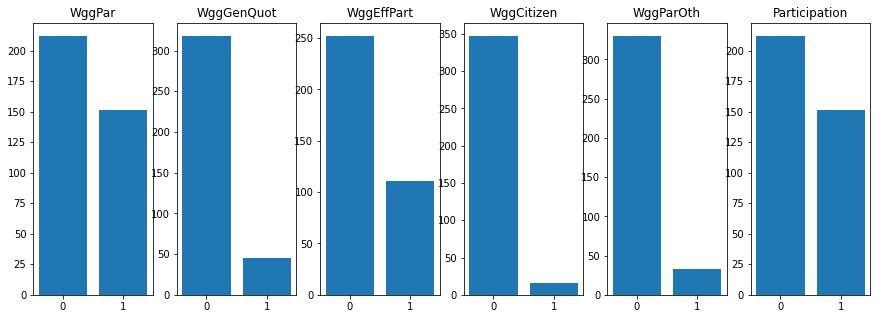

In [14]:
#visualizamos las variables relacionadas con la participación
Participation_list = ['WggPar', 'WggGenQuot', 'WggEffPart', 'WggCitizen', 'WggParOth', 'Participation']
fig, axs = plt.subplots(nrows=1, ncols=len(Participation_list), figsize= (15,5))
for i, name in enumerate(Participation_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [15]:
#creamos la nueva variable 'Women_group' agrupando las variables indicadas en women_group_list
new_data['Women_group'] = np.where((new_data['WggGrp'] | new_data['WggIndNom'] | new_data['WggRefDisp'] | new_data['WggPreg'] | new_data['WggGrpOth'])==1, 1,0)


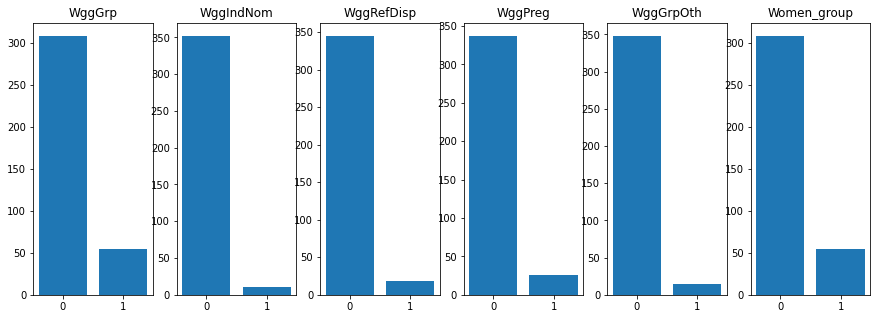

In [16]:
#Visualizamos las variables relacionadas con la participación de ciertos grupos de mujeres en el acuerdo
women_group_list = ['WggGrp', 'WggIndNom','WggRefDisp','WggPreg','WggGrpOth', 'Women_group']
fig, axs = plt.subplots(nrows=1, ncols=len(women_group_list), figsize= (15,5))
for i, name in enumerate(women_group_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [17]:
#creamos la nueva variable 'Int_Law' agrupando las variables indicadas en int_law_list
new_data['Int_Law'] = np.where((new_data['WggIntLaw'] | new_data['WggHrSta'] | new_data['WggUnsc'] | new_data['WggIntLawOth'])==1, 1, 0)


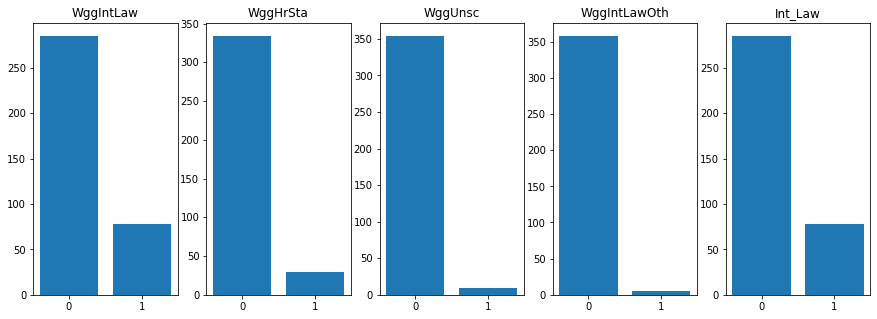

In [19]:
#visualizamos las variables relacionadas con acuerdos internacionales
int_law_list = ['WggIntLaw', 'WggHrSta', 'WggUnsc', 'WggIntLawOth', 'Int_Law']
fig, axs = plt.subplots(nrows=1, ncols=len(int_law_list), figsize= (15,5))
for i, name in enumerate(int_law_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [21]:
#creamos una nueva variable agrupando las variables en new_inst_list
new_data['New_inst'] = np.where((new_data['WggNewInst'] | new_data['WggInstWom'] | new_data['WggInf'] | new_data['WggRecon'] | new_data['WggNewInstOth'])==1, 1, 0) 

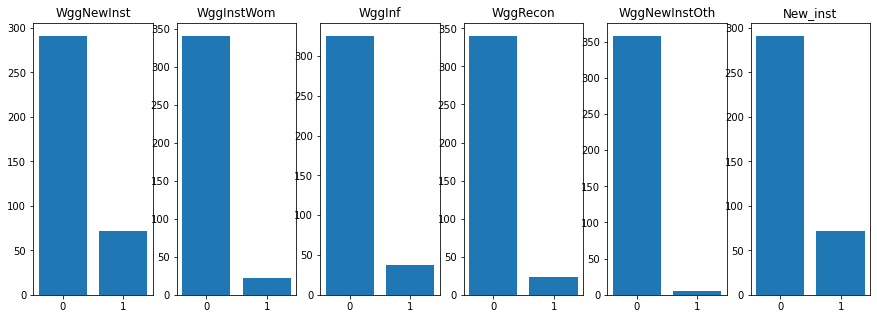

In [22]:
#visualizamos las variables relacionadas con la mención en el acuerdo de nuevas instituciones relacionadas con la mujer
new_inst_list = ['WggNewInst', 'WggInstWom', 'WggInf', 'WggRecon', 'WggNewInstOth', 'New_inst']
fig, axs = plt.subplots(nrows=1, ncols=len(new_inst_list), figsize= (15,5))
for i, name in enumerate(new_inst_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [23]:
#creamos una nueva variable agrupando las variables de violence_list
new_data['Violence'] = np.where((new_data['WggVio'] | new_data['WggVioSex'] | new_data['WggVioGen'] | new_data['WggVioProt'] | new_data['WggVioOth'])==1, 1, 0)

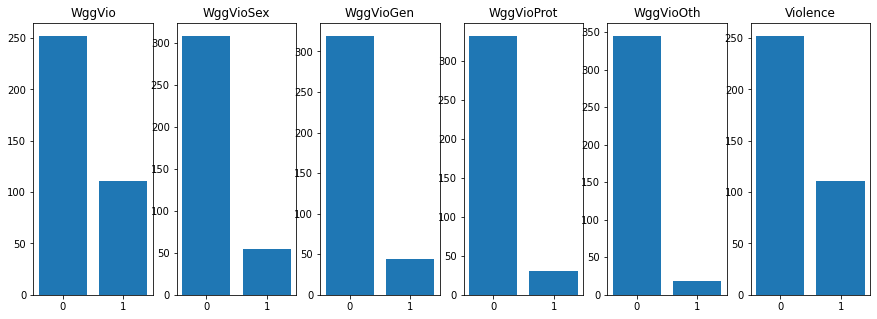

In [24]:
#visualizamos las variables relacionadas con la violencia de sexo
violence_list = ['WggVio', 'WggVioSex', 'WggVioGen', 'WggVioProt', 'WggVioOth', 'Violence']
fig, axs = plt.subplots(nrows=1, ncols=len(violence_list), figsize= (15,5))
for i, name in enumerate(violence_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [25]:
#creamos una nueva variable agrupando las variables de Transitional Justice
new_data['Trans_Just'] = np.where((new_data['WggTraJus'] | new_data['WggPast'] | new_data['WggPri'] | new_data['WggTraJusOth'])==1, 1, 0)

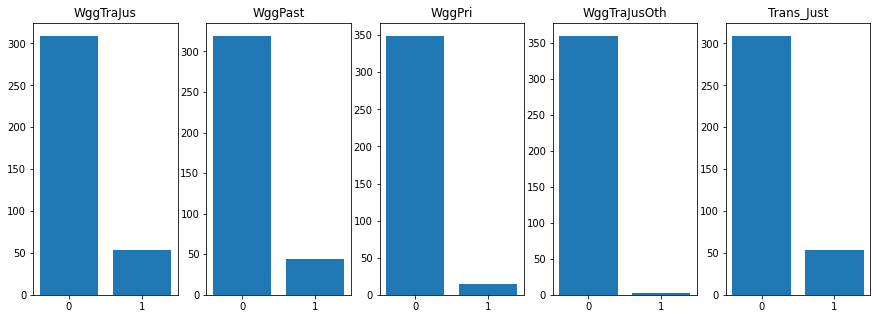

In [26]:
#visualizamos las variables relacionadas con Transitional justice
violence_list = ['WggTraJus', 'WggPast', 'WggPri', 'WggTraJusOth', 'Trans_Just']
fig, axs = plt.subplots(nrows=1, ncols=len(violence_list), figsize= (15,5))
for i, name in enumerate(violence_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [29]:
#creamos una nueva variable 'Inst_Reform' que agrupa las variables indicadas en inst_reform_list
new_data['Inst_Reform'] = np.where((new_data['WggInstRef'] | new_data['WggLawRef'] | new_data['WggJud'] | new_data['WggPol'] | new_data['WggDdr'] | new_data['WggPubAdm'] | new_data['WggInstRefOth'])==1, 1, 0)

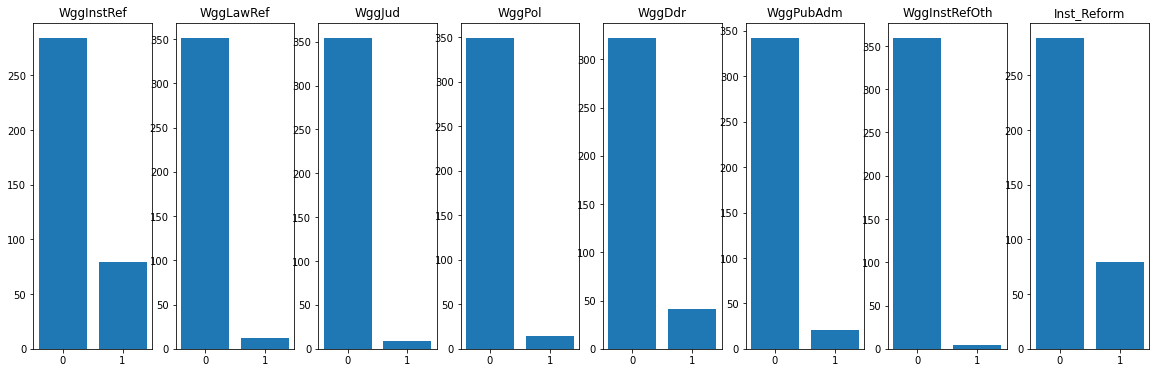

In [30]:
#visualizamos las variables relacionadas con la mención en el acuerdo de paz de reformas institucionales
inst_reform_list = ['WggInstRef', 'WggLawRef', 'WggJud', 'WggPol', 'WggDdr', 'WggPubAdm', 'WggInstRefOth', 'Inst_Reform']
fig, axs = plt.subplots(nrows=1, ncols=len(inst_reform_list), figsize= (20,6))
for i, name in enumerate(inst_reform_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [31]:
#creamos una nueva var 'Dev' agrupando las variables de dev_list
new_data['Dev'] = np.where((new_data['WggDev'] | new_data['WggDevGen'] | new_data['WggRehab'] | new_data['WggEdu'] | new_data['WggHea'] | new_data['WggRepro'] | new_data['WggDevOth'])==1, 1, 0)


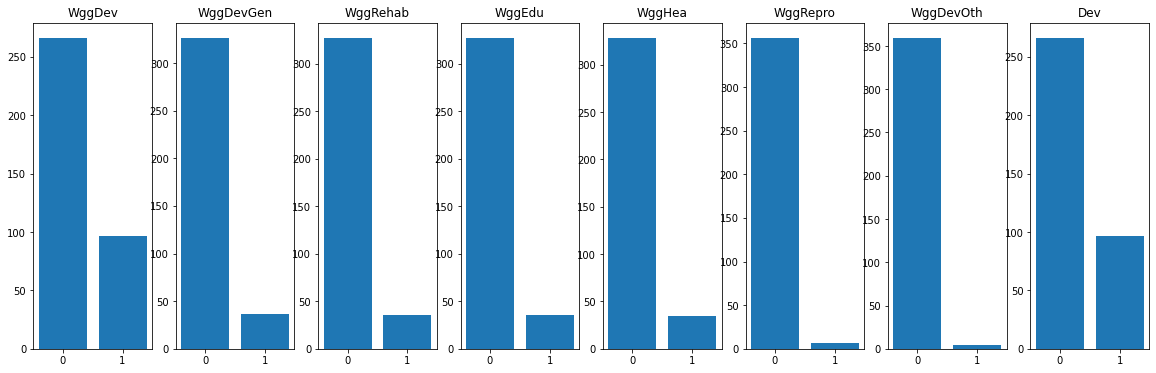

In [33]:
#visualizamos las variables relacionadas con el desarrollo relacionado con la mujer
dev_list= ['WggDev', 'WggDevGen', 'WggRehab', 'WggEdu', 'WggHea', 'WggRepro', 'WggDevOth', 'Dev']
fig, axs = plt.subplots(nrows=1, ncols=len(dev_list), figsize= (20,6))
for i, name in enumerate(dev_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [34]:
#creamos una nueva variable 'Imp' agrupando las variables en imp_list
new_data['Imp'] = np.where((new_data['WggImpl'] | new_data['WggImplRole'] | new_data['WggImplSign'] | new_data['WggImplOth'])==1, 1, 0)


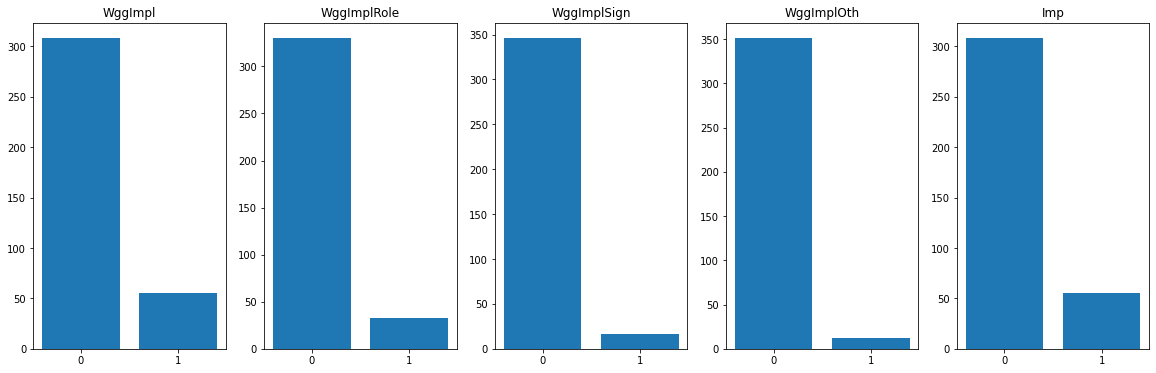

In [35]:
#visualizamos las variables relacionadas con la implementación
imp_list= ['WggImpl', 'WggImplRole', 'WggImplSign', 'WggImplOth', 'Imp']
fig, axs = plt.subplots(nrows=1, ncols=len(imp_list), figsize= (20,6))
for i, name in enumerate(imp_list):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [36]:
#hemos agregagado nuevas variables
new_data.shape

(363, 88)

In [37]:
#verificamos los atributos que contienen valores nan
na_dict = { name: new_data[name].isna().sum() for name in new_data.columns if new_data[name].isna().sum()!=0}
na_dict

{'StageSub': 5,
 'Part': 5,
 'ThrdPart': 151,
 'OthAgr': 147,
 'Loc1ISO': 5,
 'Loc2ISO': 342,
 'Loc1GWNO': 4,
 'Loc2GWNO': 342,
 'UcdpCon': 52,
 'UcdpAgr': 263,
 'PamAgr': 347,
 'CowWar': 149}

In [38]:
#seleccionamos los atributos con más del 60% con valores nan y los eliminamos del dataset final
na_to_drop = {key: value for key, value in na_dict.items() if (value/len(pax_data)>0.60)}
na_to_drop
new_data = new_data.drop(columns = na_to_drop.keys())

In [39]:
na_to_drop

{'Loc2ISO': 342, 'Loc2GWNO': 342, 'UcdpAgr': 263, 'PamAgr': 347}

In [40]:
#como se ha eliminado la información de Loc1ISO y Loc2GWNO, no tiene mucho sentido mantener las variables correspondiente Loc1 
new_data = new_data.drop(columns = ['Loc1ISO', 'Loc1GWNO'])
new_data.shape

(363, 82)

In [81]:
upper_new = new_data[new_var].corr()
upper_cor = [column for column in upper.columns if (any(upper_new[column]>0.80 ))]

In [85]:
upper_new

,Dev,Equality,Imp,Inst_Reform,Int_Law,New_inst,Participation,Violence,Women_group,Trans_Just
Dev,1.000000,0.356560,0.074713,0.149209,0.214577,0.261667,0.185040,0.207258,0.300431,0.149933
Equality,0.356560,1.000000,-0.059050,0.175290,0.329509,0.165513,0.193609,0.103889,0.214445,-0.002989
Imp,0.074713,-0.059050,1.000000,0.056424,0.040813,0.136628,0.079830,0.069735,0.164286,0.104030
Inst_Reform,0.149209,0.175290,0.056424,1.000000,0.325486,0.189703,0.096680,0.055685,0.093664,0.135979
Int_Law,0.214577,0.329509,0.040813,0.325486,1.000000,0.177096,0.034750,0.278751,0.227873,0.101716
New_inst,0.261667,0.165513,0.136628,0.189703,0.177096,1.000000,0.168892,0.029741,0.155896,0.083272
Participation,0.185040,0.193609,0.079830,0.096680,0.034750,0.168892,1.000000,0.034287,0.033066,0.024144
Violence,0.207258,0.103889,0.069735,0.055685,0.278751,0.029741,0.034287,1.000000,0.136439,0.159414
Women_group,0.300431,0.214445,0.164286,0.093664,0.227873,0.155896,0.033066,0.136439,1.000000,0.125621
Trans_Just,0.149933,-0.002989,0.104030,0.135979,0.101716,0.083272,0.024144,0.159414,0.125621,1.000000


In [67]:
#verificamos las variables con alta correlación
pax_corr = new_data.corr()
upper = pax_corr.where(np.triu(np.ones(pax_corr.shape),k=1).astype(np.bool))

upper_cor = [column for column in upper.columns if (any(upper[column]>0.80))]
upper_cor


['WggEqGen',
 'WggHR',
 'WggPast',
 'Equality',
 'Participation',
 'Women_group',
 'Int_Law',
 'New_inst',
 'Violence',
 'Trans_Just',
 'Inst_Reform',
 'Dev',
 'Imp']

In [42]:
#verificamos los atributos con nan nuevamente
{ name: new_data[name].isna().sum() for name in new_data.columns if new_data[name].isna().sum()!=0}

{'StageSub': 5,
 'Part': 5,
 'ThrdPart': 151,
 'OthAgr': 147,
 'UcdpCon': 52,
 'CowWar': 149}

In [43]:
#UcdpCon y CowWar se eliminan, por no tener datos suficientes y no ser de interés para este proyecto
new_data = new_data.drop(columns = ['UcdpCon', 'CowWar'])

#El resto de variables con NaN se completan con 'NA'
new_data = new_data.fillna(value = 'NA')

In [44]:
new_data.shape

(363, 80)

In [45]:
#verificamos que ya no tengamos valores nan
{ name: new_data[name].isna().sum() for name in new_data.columns if new_data[name].isna().sum()!=0}

{}

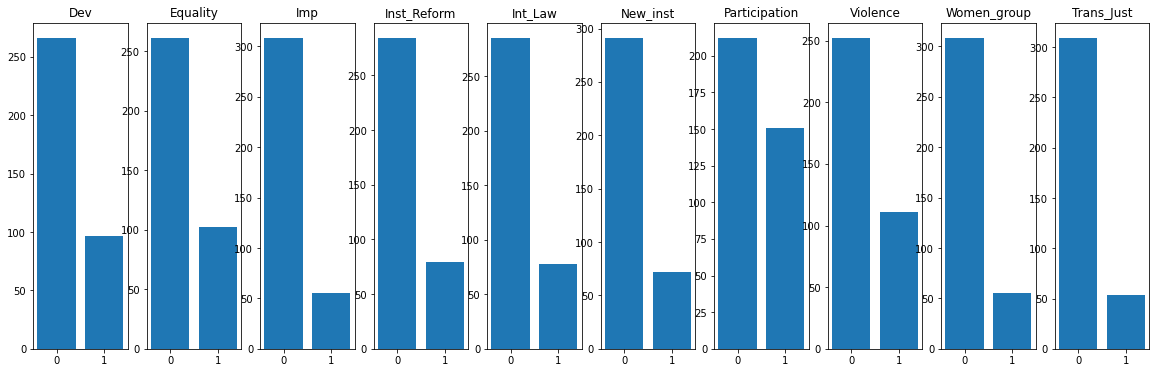

In [51]:
new_var = ['Dev','Equality','Imp', 'Inst_Reform', 'Int_Law', 'New_inst', 'Participation', 'Violence', 'Women_group', 'Trans_Just']
fig, axs = plt.subplots(nrows=1, ncols=len(new_var), figsize= (20,6))
for i, name in enumerate(new_var):
    axs[i].bar(x_values, new_data[name].value_counts())
    axs[i].set_title(name)

In [54]:
new_data['PP'] = new_data['PP'].astype(object)
new_data['AgtId'] = new_data['AgtId'].astype(object)
new_data.dtypes
new_data.describe(include='int64').to_csv("new_data_obj_var.csv")

In [46]:
#eliminamos variables que no se utilizarán
del_var = ['Contp', 'Status', 'Agtp', 'Stage', 'StageSub', 'Part', 'ThrdPart', 'OthAgr', 'Lgt', 'N_characters']
new_data = new_data.drop(new_data[del_var], axis=1)

In [56]:
new_data.to_csv("pax_vis_pec3.csv")

In [55]:
new_data[new_var].dtypes

Dev              int64
Equality         int64
Imp              int64
Inst_Reform      int64
Int_Law          int64
New_inst         int64
Participation    int64
Violence         int64
Women_group      int64
Trans_Just       int64
dtype: object

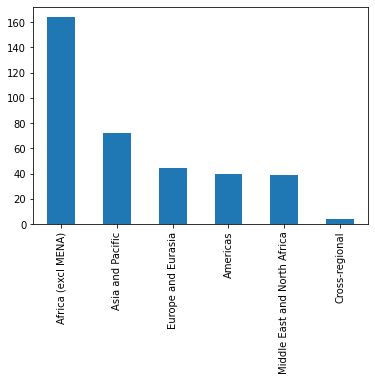

In [57]:
new_data['Reg'].value_counts().plot(kind='bar')

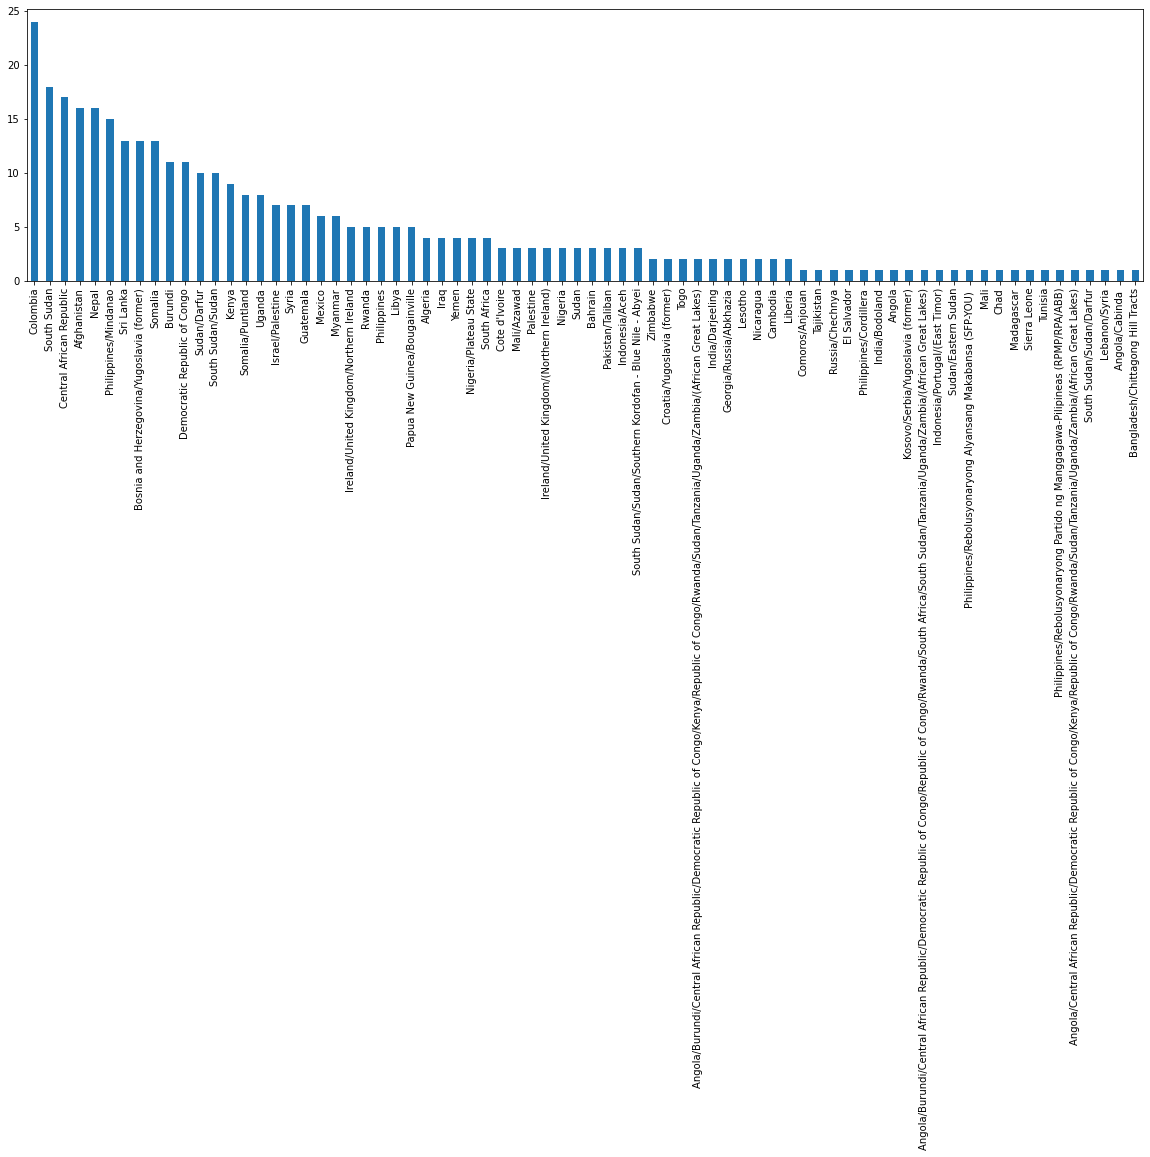

In [58]:
new_data['Con'].value_counts().plot(kind='bar', figsize =(20,5))